In [69]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import load_model, Model
import tensorflow as tf
import keras
import matplotlib.pyplot as plt


class MyCNN:
  # constructor
  def __init__(self):
    self.model = None

  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape = input_dim) # X dau vao cua minh
    C1 = Conv2D(6, (3, 3), padding='same')(input)
    S2 = MaxPooling2D(pool_size=(2, 2), padding="same")(C1)
    C3 = Conv2D(16, (3, 3), padding='same')(S2)
    S4 = MaxPooling2D(pool_size=(2, 2), padding="same")(C3)

    flat = Flatten()(C3)
    # These like ANN
    F5 = Dense(120, use_bias=True)(flat)
    F6 = Dense(84, use_bias=True)(F5)
    output = Dense(10, use_bias=True)(F6) # y~ output
    self.model = Model(input, output)
  
  # Train the model
  def train(self, x_train, y_train): # x_train chinh la X, y_train chinh la ground-truth
    sgd = keras.optimizers.SGD(learning_rate=0.01)
    self.model.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
    self.model.fit(x_train, y_train, epochs = 50, batch_size = 128)
  
  # Load model from file
  def load(self, model_file):
    self.model = load_model(model_file)
  
  # save the trained model
  def save(self, model_file):
    self.model.save(model_file)
  
  # Show the architecture of the model
  def summary(self):
    self.model.summary()

  # Test the model with a given input
  def predict(self, x_test):
    return self.model.predict(x_test)

In [70]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [64]:
import numpy as np

def onehot(y):
  oh = np.zeros((y.shape[0], 10))
  for i in range(y.shape[0]):
    oh[i, int(y[i])]=1
  return oh

In [71]:
from sklearn import preprocessing
import numpy as np

# Normalize train data
y_train_oh = onehot(y_train)
y_train_oh.shape

y_test_oh = onehot(y_test)
y_test_oh.shape

x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [5]:
x_train_norm.shape

(60000, 28, 28)

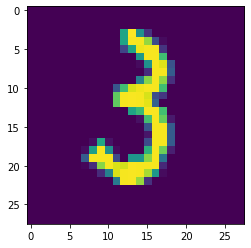

Label:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [6]:
import matplotlib.pyplot as plt

# Visualize training data
plt.imshow(x_train[1234])
plt.show()
print('Label: ', y_train_oh[1234])

In [72]:
# Build and train CNN model
cnn = MyCNN()
cnn.build((28, 28, 1))
cnn.train(x_train_norm, y_train_oh)

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0986
Epoch 2/50
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 6/50
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 7/50
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 10/50
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 11/50
469/469 [========

# Câu 1

In [73]:
# Câu 1: Hãy viết code để tính độ chính xác trên tập test
y_test_pred = cnn.predict(x_test_norm)

313/313 [==============================] - 1s 2ms/step


In [49]:
from sklearn.metrics import accuracy_score
print('Accuracy on test: ', accuracy_score(y_test, y_test_pred.argmax(axis=1)))

Accuracy on test:  0.9853


# Câu 2

In [ ]:
# Câu 2: Hãy thử nghiệm với kiến trúc sau:
#   - Từ kiến trúc MyCNN gốc, hãy loại bỏ hết bước MaxPooling --> Tính độ chính xác trên tập test

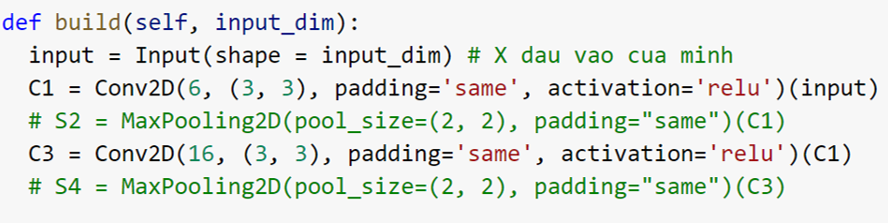

In [55]:
print('Accuracy on test: ', accuracy_score(y_test, y_test_pred.argmax(axis=1)))

Accuracy on test:  0.9802


# Câu 3

In [ ]:
# Câu 3: Hãy thử nghiệm với kiến trúc sau:
#   - Từ kiến trúc MyCNN gốc, hãy loại bỏ hết activation --> Tính độ chính xác trên tập test

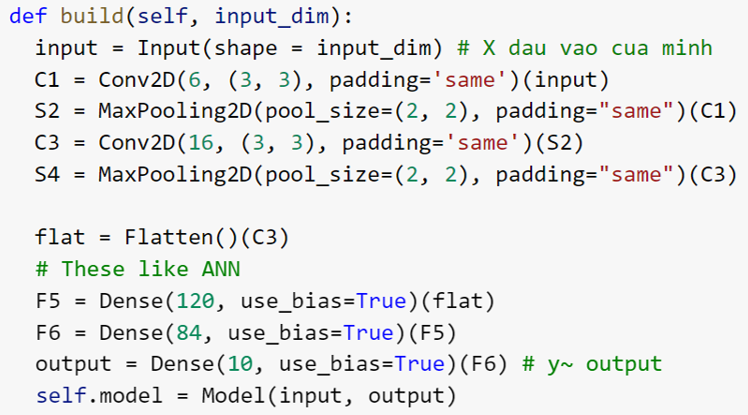

In [74]:
print('Accuracy on test: ', accuracy_score(y_test, y_test_pred.argmax(axis=1)))

Accuracy on test:  0.098


# Câu 4

In [ ]:
# Câu 4: Hãy thử nghiệm với kiến trúc sau:
#   - Từ kiến trúc MyCNN gốc, hãy loại bỏ hết Conv2D --> Tính độ chính xác trên tập test

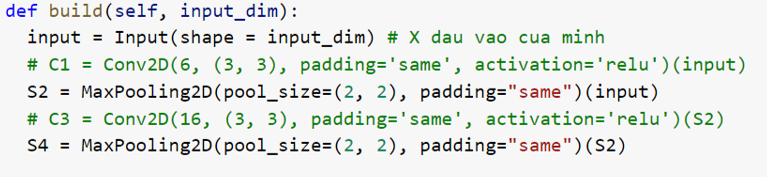

In [68]:
print('Accuracy on test: ', accuracy_score(y_test, y_test_pred.argmax(axis=1)))

Accuracy on test:  0.884
